In [3]:
# Professional Library Imports and Configurations

# Core Libraries for Data Manipulation and Computation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations and matrix computations

# Advanced Data Visualization Libraries
import matplotlib.pyplot as plt  # Static plotting
import seaborn as sns  # Statistical data visualization
import plotly.express as px  # Interactive plotting
import plotly.graph_objects as go  # Advanced interactive visualizations

# Machine Learning and Evaluation Tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb  # High-performance gradient boosting library
# Utilities and System Tools
import os  # Operating system utilities
import time  # Time performance tracking
import warnings  # Warning suppression for clean output

# Suppress Non-Critical Warnings for Better Readability
warnings.filterwarnings("ignore")

# Configure Matplotlib Visualization Defaults
plt.style.use("ggplot")  # Set a professional and clean style
plt.rcParams.update({
    "figure.figsize": [12, 6],  # Default figure size
    "axes.labelsize": 14,  # Label font size
    "axes.titlesize": 16,  # Title font size
    "xtick.labelsize": 12,  # X-axis tick font size
    "ytick.labelsize": 12,  # Y-axis tick font size
    "legend.fontsize": 12,  # Legend font size
    "grid.color": "#d3d3d3",  # Grid color for better readability
    "grid.linestyle": "--"  # Dashed grid lines
})

# Configure Seaborn Visualization Defaults
sns.set_theme(
    style="whitegrid",  # White grid background for clarity
    rc={"axes.facecolor": "#f9f9f9"}  # Light grey axes background
)

# Configure Plotly Default Settings for Interactive Visualizations
px.defaults.template = "plotly_white"  # Minimalist white theme for clarity
px.defaults.width = 1000  # Standard width for plots
px.defaults.height = 600  # Standard height for plots
px.defaults.color_continuous_scale = px.colors.sequential.Viridis  # Aesthetic color scale

In [4]:
file_path = "C:\\Users\\08aks\\OneDrive\\Desktop\\BKB_WaterQualityData_2020084.csv"
data = pd.read_csv(file_path)
print(data.head()) #Side ID gives the degree of closure of site x100km
print(data.shape)

   Site_Id Unit_Id   Read_Date  Salinity (ppt)  Dissolved Oxygen (mg/L)  \
0        0     NaN  01-03-1994             1.3                     11.7   
1        0     NaN   1/31/1994             1.5                     12.0   
2        0     NaN  02-07-1994             1.0                     10.5   
3        0     NaN   2/23/1994             1.0                     10.1   
4        0     NaN   2/28/1994             1.0                     12.6   

   pH (standard units)  Secchi Depth (m)  Water Depth (m)  Water Temp (?C)  \
0                  7.3              0.40             0.40              5.9   
1                  7.4              0.20             0.35              3.0   
2                  7.2              0.25             0.60              5.9   
3                  7.4              0.35             0.50             10.0   
4                  7.2              0.20             0.40              1.6   

   Air Temp-Celsius  Air Temp (?F) Time (24:00) Field_Tech DateVerified  \
0    

In [5]:
print(data.isna().sum())
data = data.drop(['Unit_Id','Read_Date','Secchi Depth (m)','Air Temp-Celsius','Air Temp (?F)','Time (24:00)','Field_Tech','DateVerified','WhoVerified','Year'], axis=1)

Site_Id                       0
Unit_Id                    2338
Read_Date                     4
Salinity (ppt)              129
Dissolved Oxygen (mg/L)     850
pH (standard units)          94
Secchi Depth (m)             72
Water Depth (m)              70
Water Temp (?C)             120
Air Temp-Celsius           2285
Air Temp (?F)                70
Time (24:00)                 62
Field_Tech                   38
DateVerified               1917
WhoVerified                1917
AirTemp (C)                   0
Year                          0
dtype: int64


In [6]:
print(data.isna().sum()) #Gives the number of NAN values in every column
data = data.interpolate()

Site_Id                      0
Salinity (ppt)             129
Dissolved Oxygen (mg/L)    850
pH (standard units)         94
Water Depth (m)             70
Water Temp (?C)            120
AirTemp (C)                  0
dtype: int64


In [7]:
print(data.isna().sum()) #This shows that all the missing values are interpolated and data is ready to use

Site_Id                    0
Salinity (ppt)             0
Dissolved Oxygen (mg/L)    0
pH (standard units)        0
Water Depth (m)            0
Water Temp (?C)            0
AirTemp (C)                0
dtype: int64


In [8]:
permutation = np.random.permutation(data.shape[0]) #randomly shuffles the rows of the data to reduce bias
data = data.iloc[permutation]

In [9]:
print(data.head())

      Site_Id  Salinity (ppt)  Dissolved Oxygen (mg/L)  pH (standard units)  \
1429        2             0.0                      4.8                  9.0   
1234        4             0.0                     10.0                  6.5   
1405        1             0.0                      4.1                  7.0   
814         0             1.0                      6.0                  6.5   
2211        1             1.0                      7.0                  7.0   

      Water Depth (m)  Water Temp (?C)  AirTemp (C)  
1429              0.3             20.0    16.111111  
1234              2.0              5.0     6.111111  
1405              0.7             21.0    16.111111  
814               0.7             20.5    17.777778  
2211              1.0             17.0    21.111111  


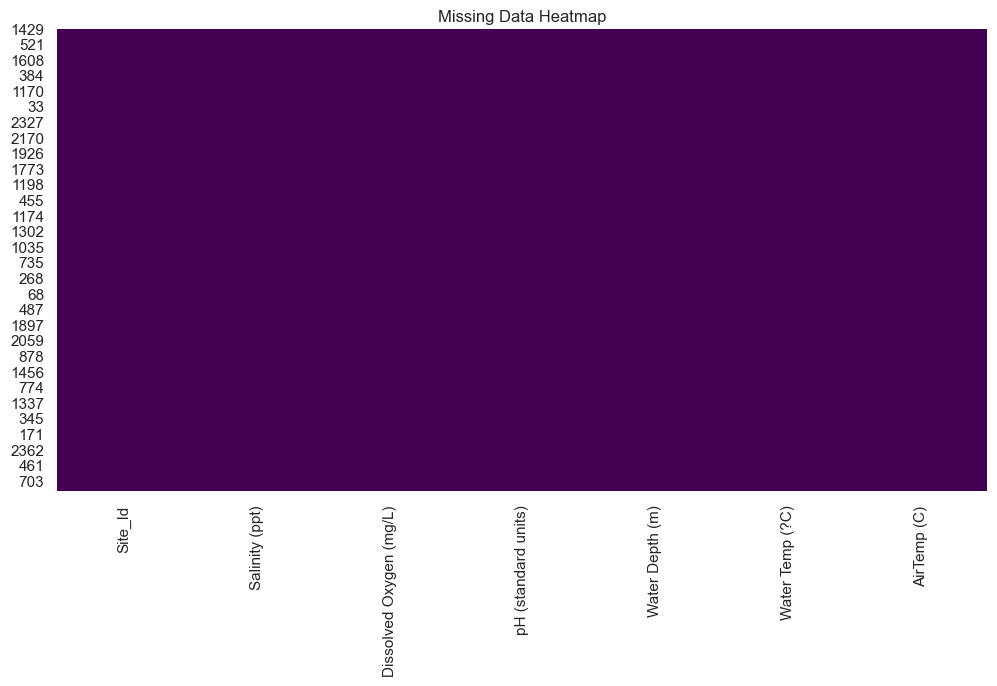

In [10]:
# Visualize missing values as a heatmap (optional for deeper inspection)
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()



In [11]:
# Check for unique values in categorical columns
categorical_columns = ['pH (standard units)', 'Site_Id']

# Print the columns of the dataframe to verify their names
print(data.columns)

for col in categorical_columns:
    # Check if the column exists in the dataframe before trying to access it
    if col in data.columns:
        unique_values = data[col].unique()
        print(f"Unique Values in {col}: {unique_values}")
    else:
        print(f"Column '{col}' not found in the DataFrame.")

Index(['Site_Id', 'Salinity (ppt)', 'Dissolved Oxygen (mg/L)',
       'pH (standard units)', 'Water Depth (m)', 'Water Temp (?C)',
       'AirTemp (C)'],
      dtype='object')
Unique Values in pH (standard units): [9.         6.5        7.         7.5        6.         8.6
 8.4        7.2        8.3        6.4        8.         5.
 8.5        6.75       8.1        8.8        6.8        7.7
 7.3        8.2        7.8        6.9        7.4        7.9
 6.7        9.5        9.1        8.7        6.6        6.3
 7.1        8.55       7.85       7.6        5.5        8.9
 7.25       8.15       9.2        5.6        6.25       6.83333333
 9.4        0.7        6.66666667 9.3        9.15       9.8
 9.6        0.3        8.25       9.35       9.9        4.8
 8.05       8.15       5.7        8.95       8.1        7.75
 8.35       9.7       ]
Unique Values in Site_Id: [2 4 1 0 3]


In [12]:
# Test for numerical homogeneity: Identify outliers using the IQR method
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
#Filters the dataset to get only numeric columns (e.g., prices, age, scores).
for col in numerical_columns: #Loops through each numeric column to check for outliers.
    Q1 = data[col].quantile(0.25)  # First quartile
    Q3 = data[col].quantile(0.75)  # Third quartile
   # Computes Q1 (25th percentile) and Q3 (75th percentile) for the column.
    IQR = Q3 - Q1  # Interquartile range
   #Calculates IQR (Interquartile Range) — the spread of the middle 50% of the data.
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Sets the boundaries for acceptable values using the IQR method.
    # Anything below lower_bound or above upper_bound is considered an outlier.

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Column: {col}\nOutliers Detected: {len(outliers)}")

Column: Site_Id
Outliers Detected: 0
Column: Salinity (ppt)
Outliers Detected: 268
Column: Dissolved Oxygen (mg/L)
Outliers Detected: 7
Column: pH (standard units)
Outliers Detected: 51
Column: Water Depth (m)
Outliers Detected: 52
Column: Water Temp (?C)
Outliers Detected: 5
Column: AirTemp (C)
Outliers Detected: 70


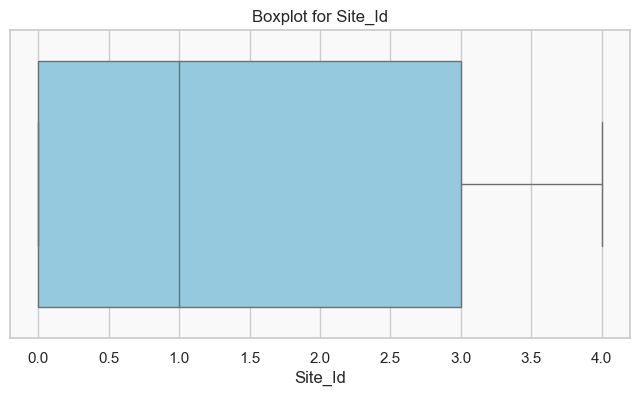

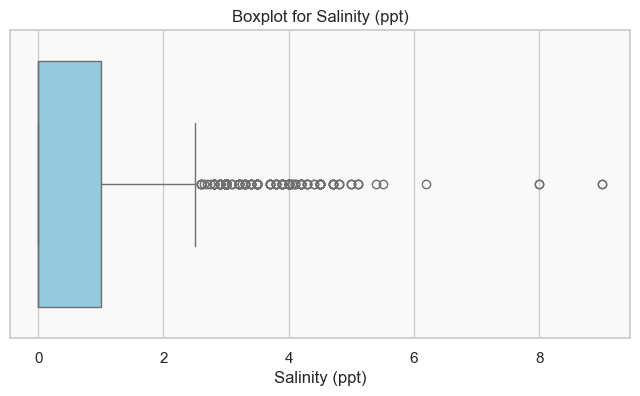

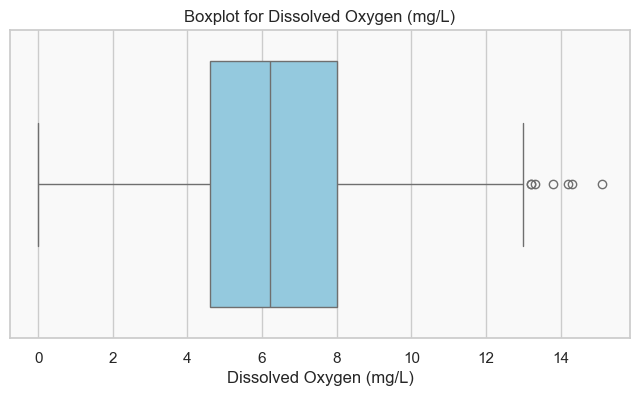

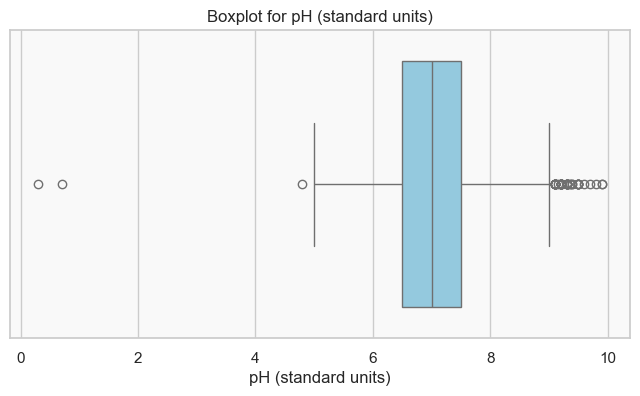

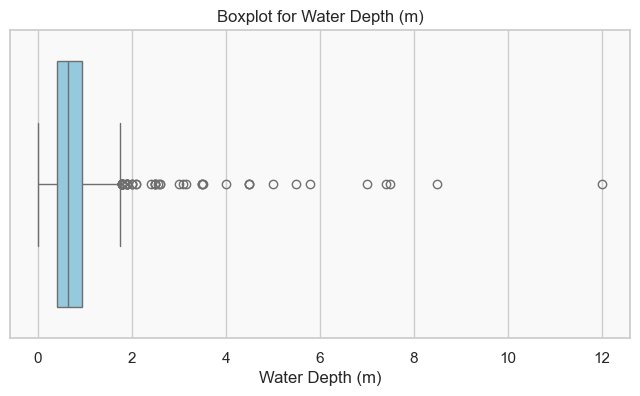

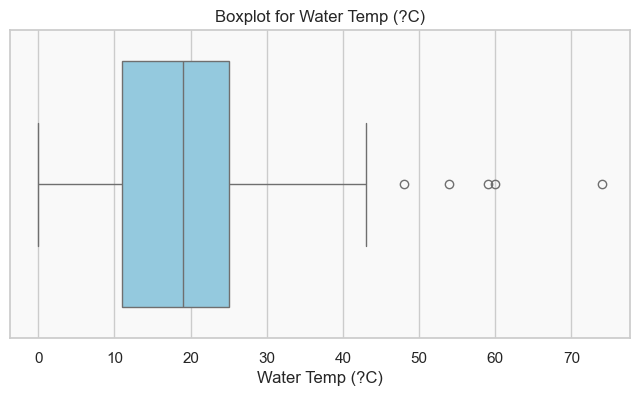

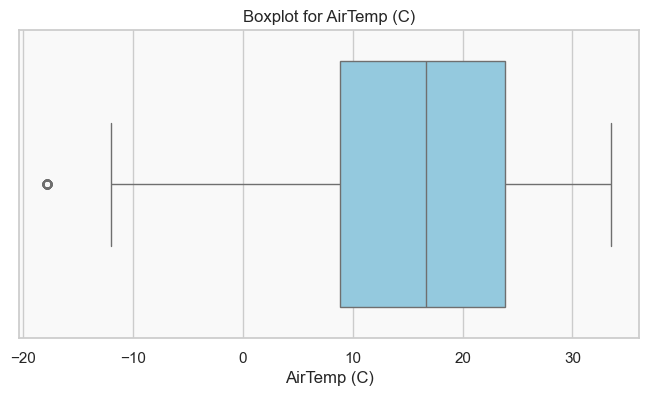

In [13]:
# Visualize numerical columns for anomalies
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col], color="skyblue")
    plt.title(f"Boxplot for {col}")
    plt.show()

Seaborn automatically calculates Q1, Q3, IQR, and plots:

Box: 25th to 75th percentile

Line inside box: median

Dots outside whiskers: outliers or anomalies

In [14]:
# Verify consistency of numerical ranges in key columns
print("\nDescriptive Statistics for Key Numerical Columns:")
print(data[numerical_columns].describe())


Descriptive Statistics for Key Numerical Columns:
           Site_Id  Salinity (ppt)  Dissolved Oxygen (mg/L)  \
count  2370.000000     2370.000000              2370.000000   
mean      1.630380        0.727764                 6.372869   
std       1.497742        1.224736                 2.315974   
min       0.000000        0.000000                 0.000000   
25%       0.000000        0.000000                 4.600000   
50%       1.000000        0.000000                 6.200000   
75%       3.000000        1.000000                 8.000000   
max       4.000000        9.000000                15.100000   

       pH (standard units)  Water Depth (m)  Water Temp (?C)  AirTemp (C)  
count          2370.000000      2370.000000      2370.000000  2370.000000  
mean              7.172595         0.764285        18.100764    15.677160  
std               0.788593         0.621280         8.280926    10.293984  
min               0.300000         0.010000         0.000000   -17.777778  
2

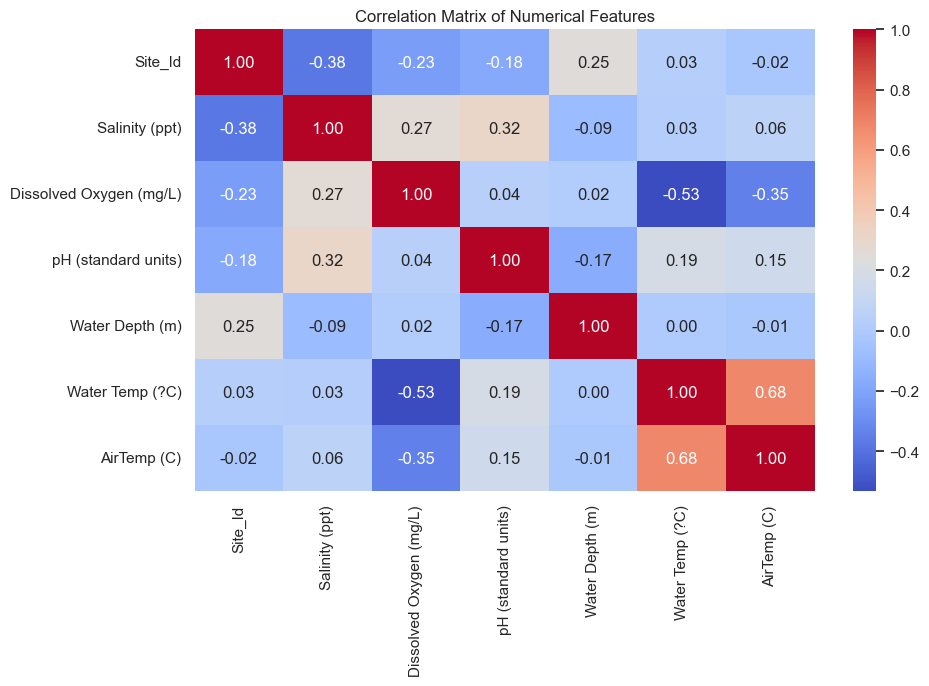

In [15]:
#This is the most important step
# Prepare Data for Numerical Correlation

# Convert non-numerical columns to appropriate formats or exclude them from correlation matrix
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation Matrix to Check Relationships Between Numerical Features
if not numerical_data.empty:
    plt.figure(figsize=(10, 6))

    correlation_matrix = numerical_data.corr()

#  Computes the correlation matrix between all numeric columns.
#  The .corr() method calculates the Pearson correlation coefficient, which ranges from:
#   +1: perfect positive correlation
# 0: no correlation
# -1: perfect negative correlation

    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Creates a heatmap using Seaborn to visualize the correlation matrix.
# annot=True: Displays the correlation values inside each cell.
# fmt=".2f": Formats those numbers to 2 decimal places.
# cmap="coolwarm": Uses a color gradient from blue (negative) to red (positive).
# cbar=True: Displays a color bar legend on the side.

    plt.title("Correlation Matrix of Numerical Features")
    plt.show()
else:
    print("No numerical data available for correlation analysis.")

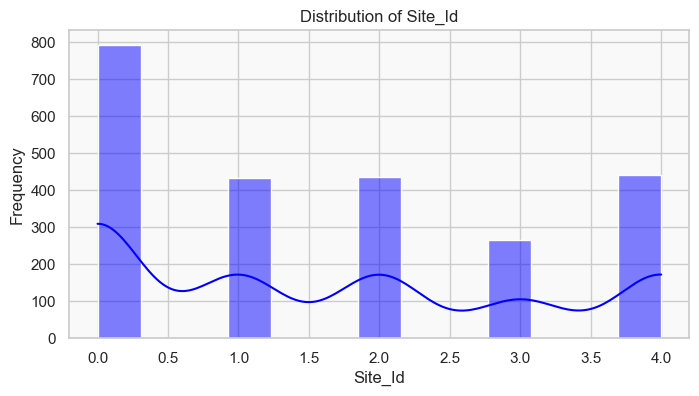

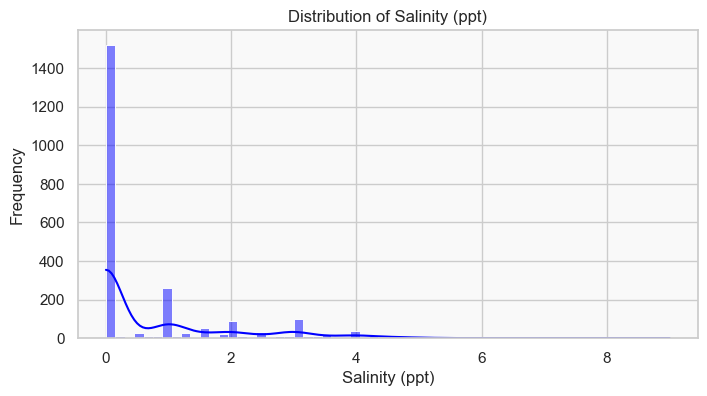

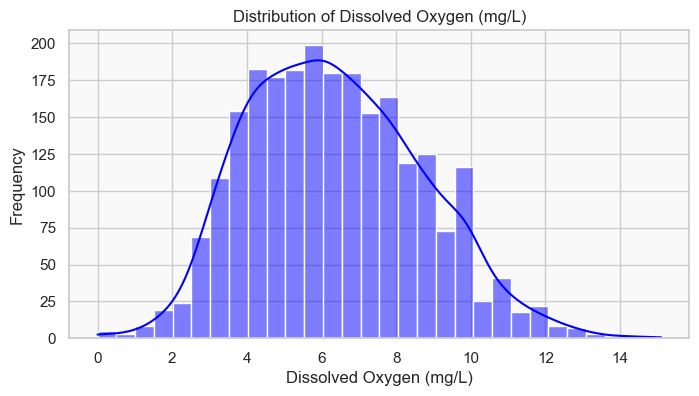

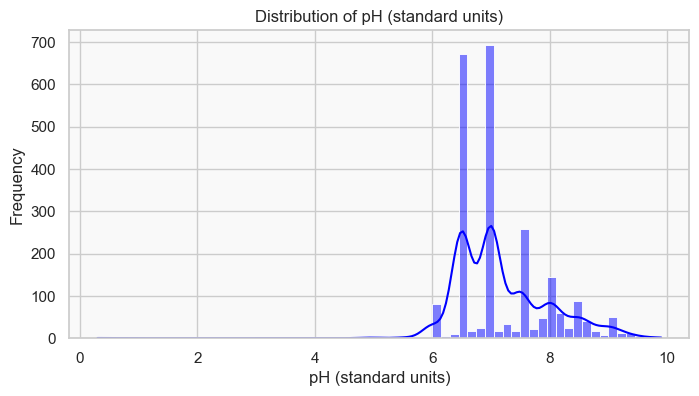

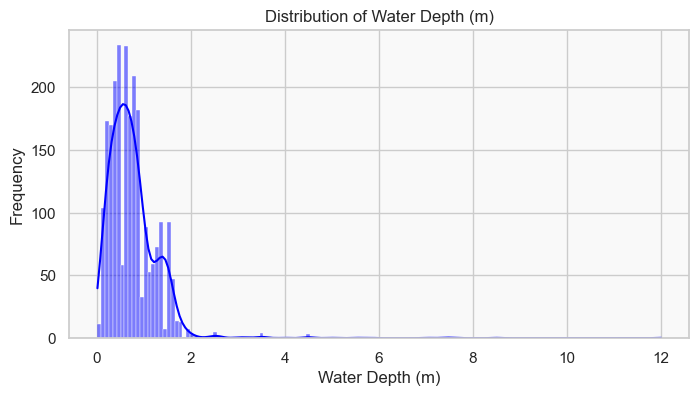

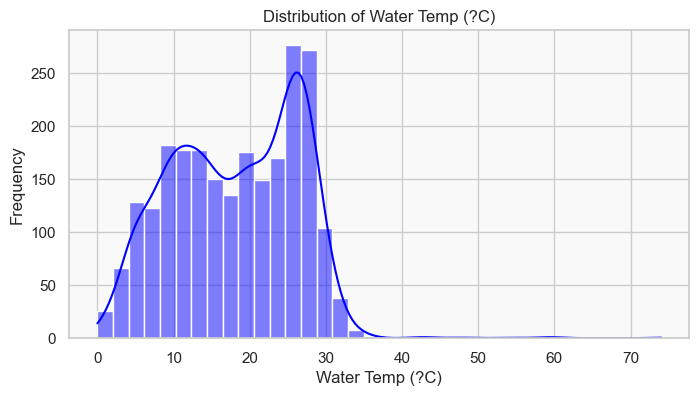

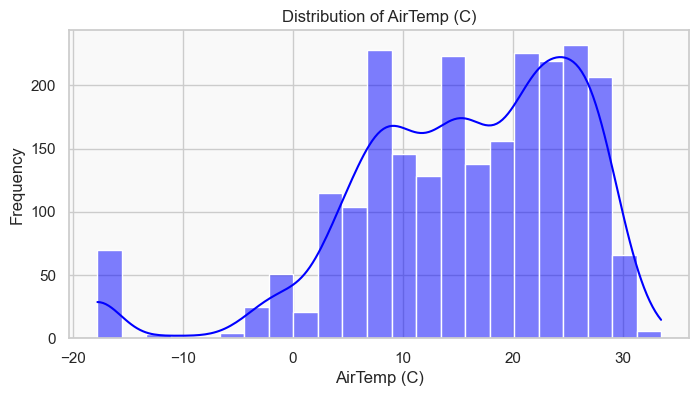

In [16]:
# Verify Distribution of Numerical Columns
for col in numerical_data.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, color="blue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# The **Chi-Square Test** is a statistical test used to determine whether there's a significant association between two categorical variables.

In [17]:



# Salinity
data['Salinity_Level'] = pd.cut(data['Salinity (ppt)'],
                                 bins=[0, 1, 5, 10],
                                 labels=['Low', 'Medium', 'High'],
                                 include_lowest=True)

# Dissolved Oxygen
data['Oxygen_Level'] = pd.cut(data['Dissolved Oxygen (mg/L)'],
                               bins=[0, 5, 8, 16],
                               labels=['Low', 'Normal', 'High'],
                               include_lowest=True)

# pH
data['pH_Level'] = pd.cut(data['pH (standard units)'],
                           bins=[0, 6.5, 7.5, 10],
                           labels=['Acidic', 'Neutral', 'Alkaline'],
                           include_lowest=True)

# Water Depth
data['Depth_Level'] = pd.cut(data['Water Depth (m)'],
                              bins=[0, 0.5, 1.5, 15],
                              labels=['Shallow', 'Medium', 'Deep'],
                              include_lowest=True)

# Water Temp
data['WaterTemp_Level'] = pd.cut(data['Water Temp (?C)'],
                                  bins=[0, 15, 30, 80],
                                  labels=['Cold', 'Warm', 'Hot'],
                                  include_lowest=True)

# Air Temp
data['AirTemp_Level'] = pd.cut(data['AirTemp (C)'],
                                bins=[-20, 10, 20, 40],
                                labels=['Cold', 'Mild', 'Hot'],
                                include_lowest=True)


In [18]:
from scipy.stats import chi2_contingency
import pandas as pd
from itertools import combinations

# List of all binned (categorical) columns
binned_cols = [
    'Salinity_Level',
    'Oxygen_Level',
    'pH_Level',
    'Depth_Level',
    'WaterTemp_Level',
    'AirTemp_Level'
]

# Loop through all combinations of two columns
for col1, col2 in combinations(binned_cols, 2):
    print(f"\nChi-Square Test: {col1} vs {col2}")

    contingency = pd.crosstab(data[col1], data[col2])

    if contingency.shape[0] > 1 and contingency.shape[1] > 1:
        chi2, p, dof, expected = chi2_contingency(contingency)
        print("Chi-square statistic:", round(chi2, 3))
        print("p-value:", round(p, 4))

        if p < 0.05:
            print("➡️ Significant association")
        else:
            print("❌ No significant association")
    else:
        print("⚠️ Not enough variation to perform test.")



Chi-Square Test: Salinity_Level vs Oxygen_Level
Chi-square statistic: 187.038
p-value: 0.0
➡️ Significant association

Chi-Square Test: Salinity_Level vs pH_Level
Chi-square statistic: 312.673
p-value: 0.0
➡️ Significant association

Chi-Square Test: Salinity_Level vs Depth_Level
Chi-square statistic: 18.853
p-value: 0.0008
➡️ Significant association

Chi-Square Test: Salinity_Level vs WaterTemp_Level
Chi-square statistic: 8.079
p-value: 0.0887
❌ No significant association

Chi-Square Test: Salinity_Level vs AirTemp_Level
Chi-square statistic: 15.992
p-value: 0.003
➡️ Significant association

Chi-Square Test: Oxygen_Level vs pH_Level
Chi-square statistic: 17.425
p-value: 0.0016
➡️ Significant association

Chi-Square Test: Oxygen_Level vs Depth_Level
Chi-square statistic: 8.097
p-value: 0.0881
❌ No significant association

Chi-Square Test: Oxygen_Level vs WaterTemp_Level
Chi-square statistic: 531.106
p-value: 0.0
➡️ Significant association

Chi-Square Test: Oxygen_Level vs AirTemp_Leve

In [19]:
# Normality Test for Numerical Columns
from scipy.stats import shapiro

for col in numerical_data.columns:
    stat, p = shapiro(data[col])
    print(f"Shapiro-Wilk Test for {col}:")
    if p > 0.05:
        print(f"P-Value: {p} -> Data appears to be normally distributed.\n")
    else:
        print(f"P-Value: {p} -> Data does not appear to be normally distributed.\n")

Shapiro-Wilk Test for Site_Id:
P-Value: 3.471639980338409e-43 -> Data does not appear to be normally distributed.

Shapiro-Wilk Test for Salinity (ppt):
P-Value: 3.44261779886275e-56 -> Data does not appear to be normally distributed.

Shapiro-Wilk Test for Dissolved Oxygen (mg/L):
P-Value: 5.130232314649717e-12 -> Data does not appear to be normally distributed.

Shapiro-Wilk Test for pH (standard units):
P-Value: 2.3078836340474495e-38 -> Data does not appear to be normally distributed.

Shapiro-Wilk Test for Water Depth (m):
P-Value: 3.019738915426395e-56 -> Data does not appear to be normally distributed.

Shapiro-Wilk Test for Water Temp (?C):
P-Value: 1.323129935622761e-26 -> Data does not appear to be normally distributed.

Shapiro-Wilk Test for AirTemp (C):
P-Value: 6.236594306758512e-33 -> Data does not appear to be normally distributed.



In [20]:
# 1. Display Basic Information About the Dataset
print("\n📋 **Dataset Overview:**\n")
print(data.info())


📋 **Dataset Overview:**

<class 'pandas.core.frame.DataFrame'>
Index: 2370 entries, 1429 to 446
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Site_Id                  2370 non-null   int64   
 1   Salinity (ppt)           2370 non-null   float64 
 2   Dissolved Oxygen (mg/L)  2370 non-null   float64 
 3   pH (standard units)      2370 non-null   float64 
 4   Water Depth (m)          2370 non-null   float64 
 5   Water Temp (?C)          2370 non-null   float64 
 6   AirTemp (C)              2370 non-null   float64 
 7   Salinity_Level           2370 non-null   category
 8   Oxygen_Level             2370 non-null   category
 9   pH_Level                 2370 non-null   category
 10  Depth_Level              2370 non-null   category
 11  WaterTemp_Level          2370 non-null   category
 12  AirTemp_Level            2370 non-null   category
dtypes: category(6), float64(6), int64(1)
mem

In [21]:
# 2. Display the First Few Rows of the Dataset
print("\n🔍 **First 5 Rows of the Dataset:**\n")
print(data.head())


🔍 **First 5 Rows of the Dataset:**

      Site_Id  Salinity (ppt)  Dissolved Oxygen (mg/L)  pH (standard units)  \
1429        2             0.0                      4.8                  9.0   
1234        4             0.0                     10.0                  6.5   
1405        1             0.0                      4.1                  7.0   
814         0             1.0                      6.0                  6.5   
2211        1             1.0                      7.0                  7.0   

      Water Depth (m)  Water Temp (?C)  AirTemp (C) Salinity_Level  \
1429              0.3             20.0    16.111111            Low   
1234              2.0              5.0     6.111111            Low   
1405              0.7             21.0    16.111111            Low   
814               0.7             20.5    17.777778            Low   
2211              1.0             17.0    21.111111            Low   

     Oxygen_Level  pH_Level Depth_Level WaterTemp_Level AirTemp_Lev

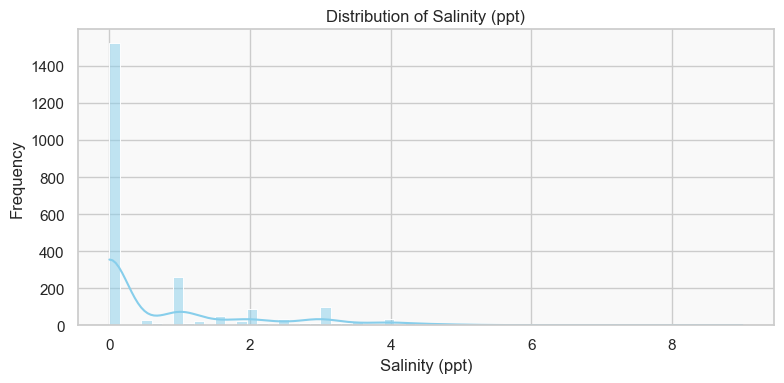

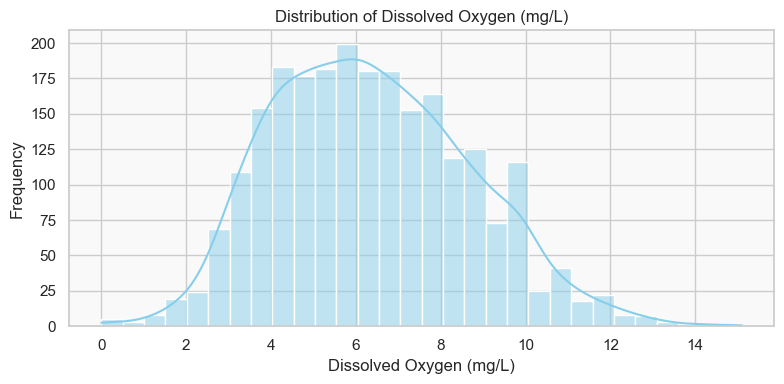

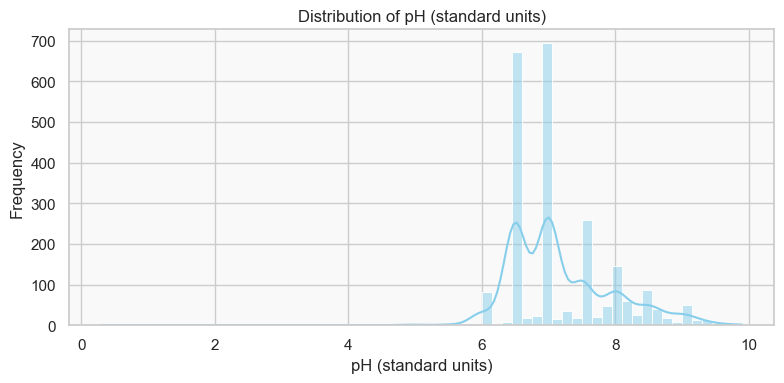

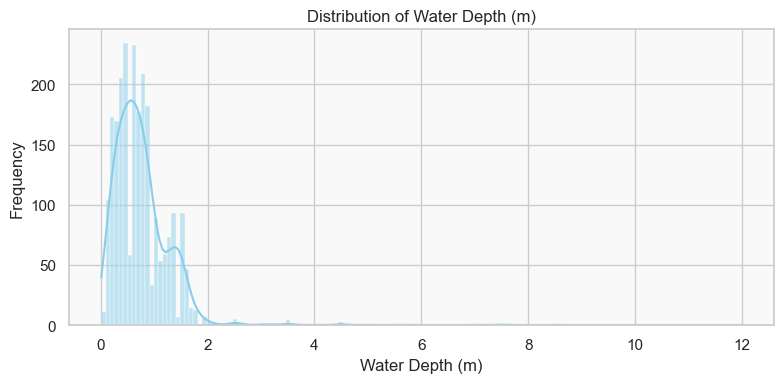

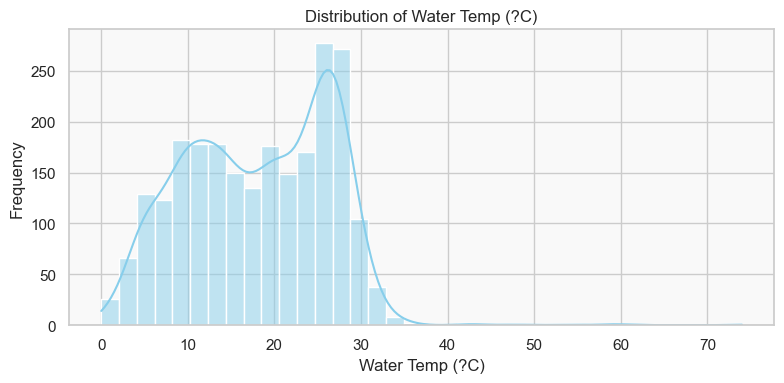

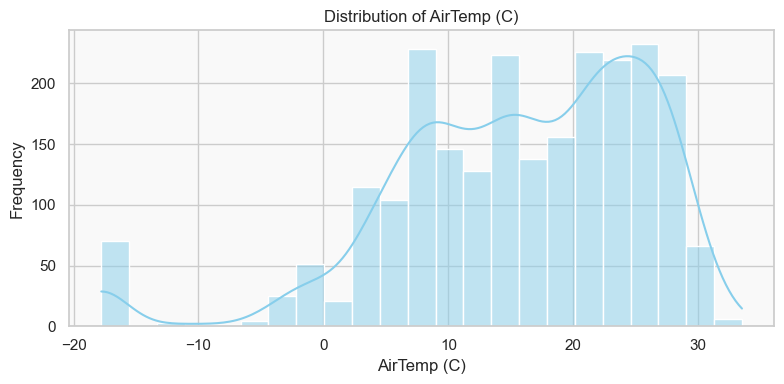

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Distribution of Numerical Features
numerical_columns = [
    'Salinity (ppt)',
    'Dissolved Oxygen (mg/L)',
    'pH (standard units)',
    'Water Depth (m)',
    'Water Temp (?C)',
    'AirTemp (C)'
]

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


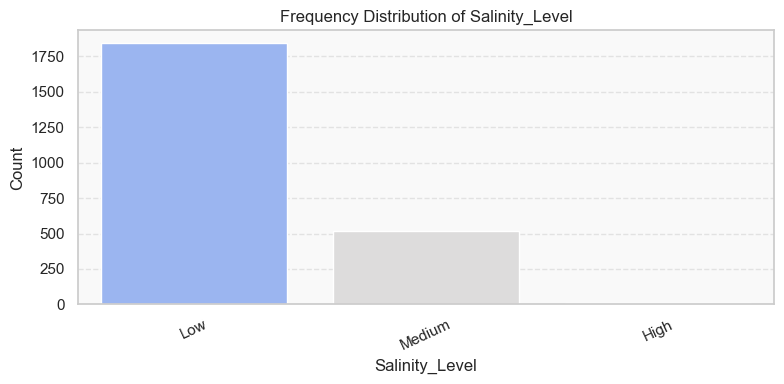

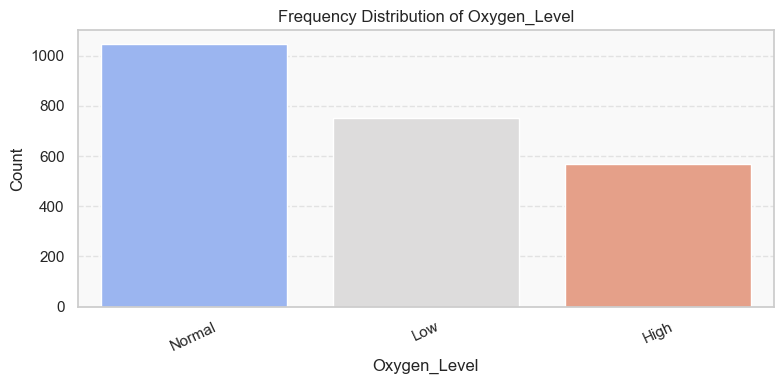

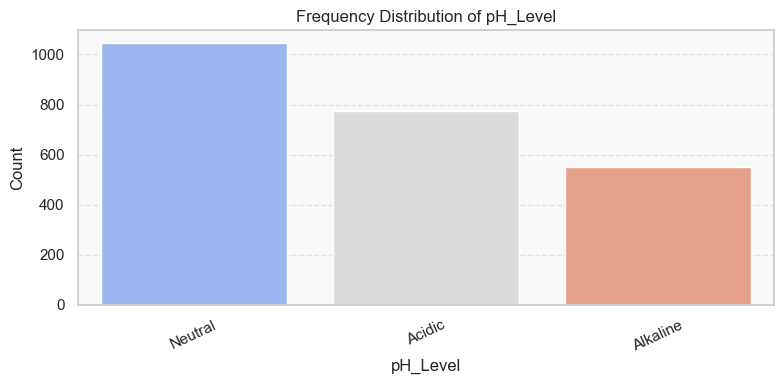

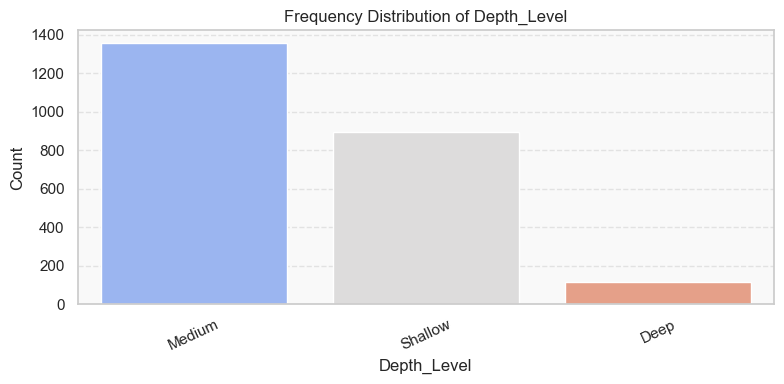

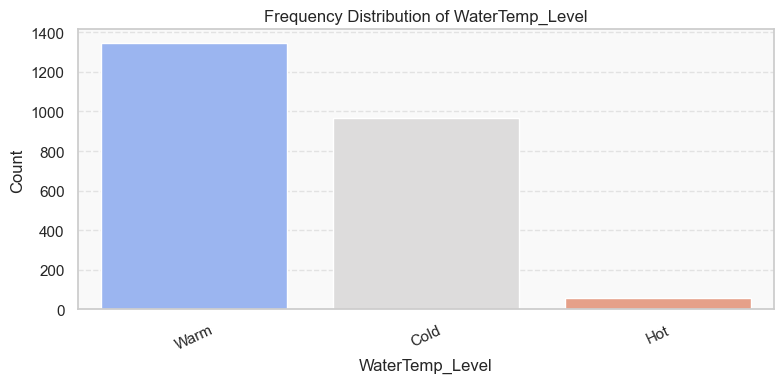

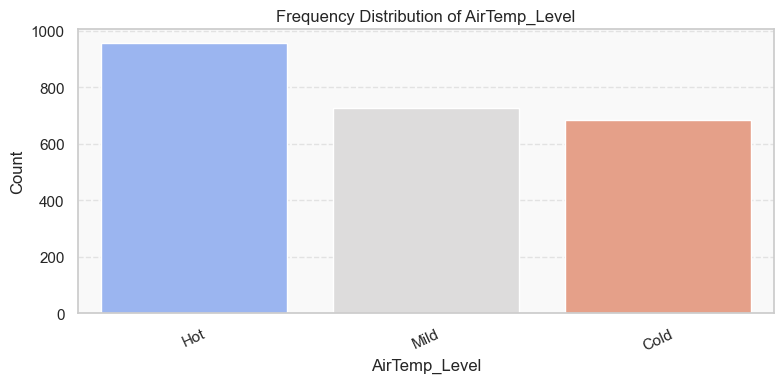

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 6. Frequency Distribution of Categorical Features
categorical_columns = [
    'Salinity_Level',
    'Oxygen_Level',
    'pH_Level',
    'Depth_Level',
    'WaterTemp_Level',
    'AirTemp_Level'
]

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data[col], palette="coolwarm", order=data[col].value_counts().index)
    plt.title(f"Frequency Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=25)
    plt.tight_layout()
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.show()


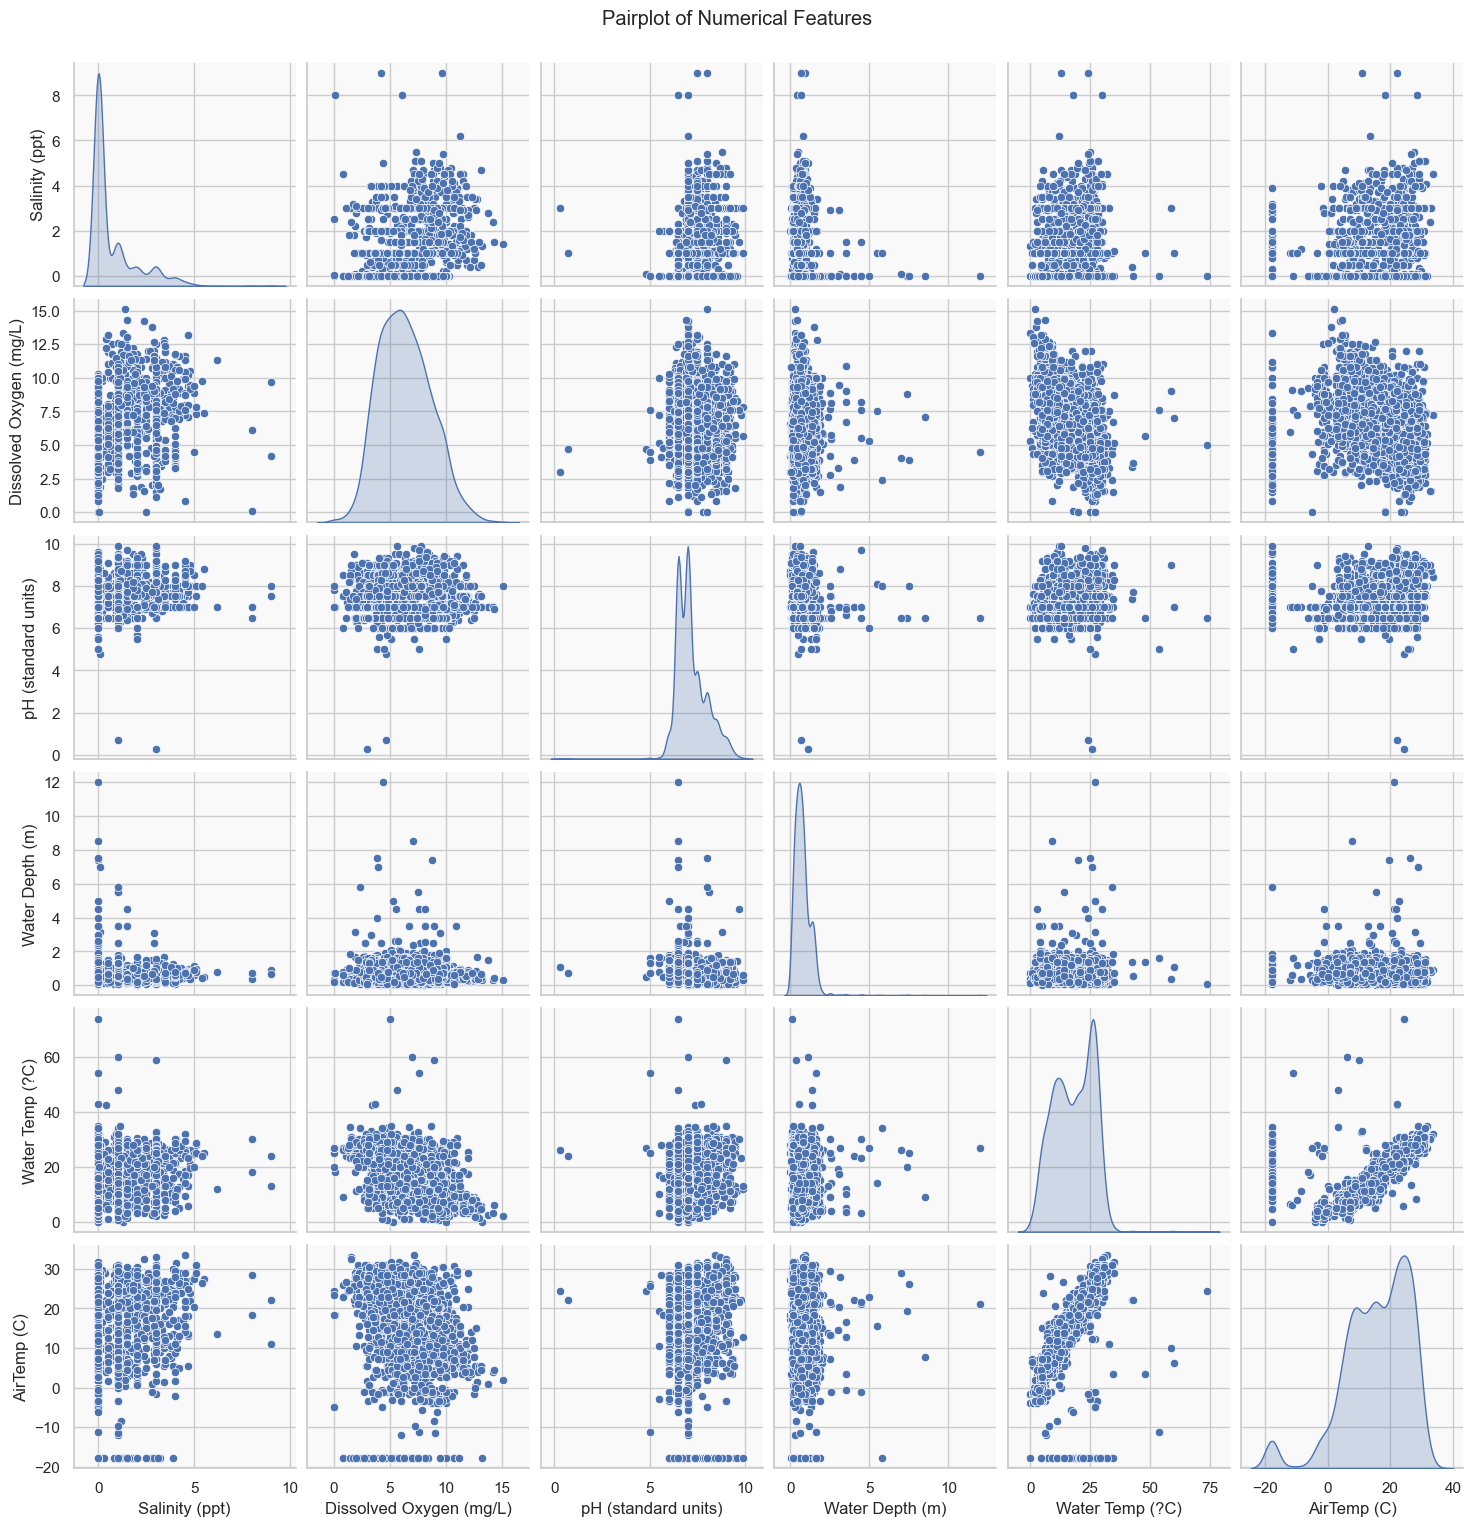

In [24]:
# 7. Pairplot for Numerical Relationships
sns.pairplot(data[numerical_columns], diag_kind="kde")

# Uses Seaborn's pairplot function to:
# Plot scatterplots for each pair of numerical columns.
# Plot KDE (Kernel Density Estimation) curves on the diagonals instead of histograms (diag_kind="kde").
# data[numerical_columns]: selects only the numerical columns to plot.

plt.suptitle("Pairplot of Numerical Features", y=1.02)

# Adds a super title above the entire grid of plots.
# y=1.02 lifts the title slightly above the plot area to prevent overlap.
plt.show()

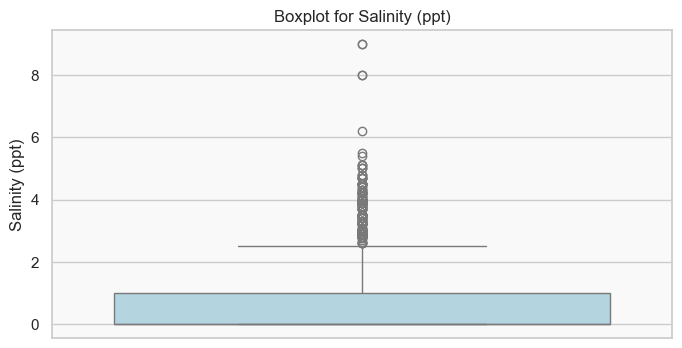

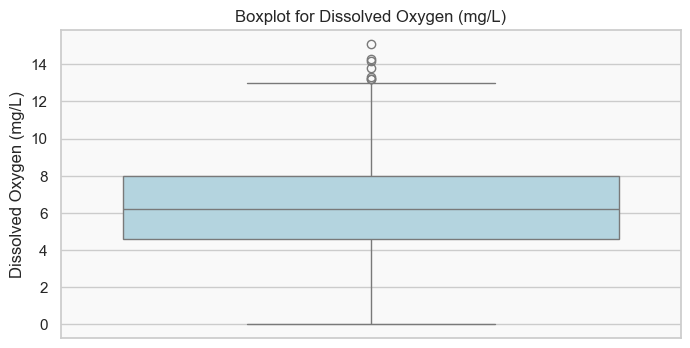

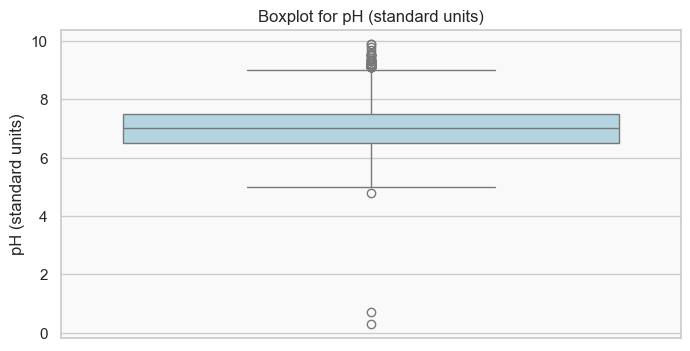

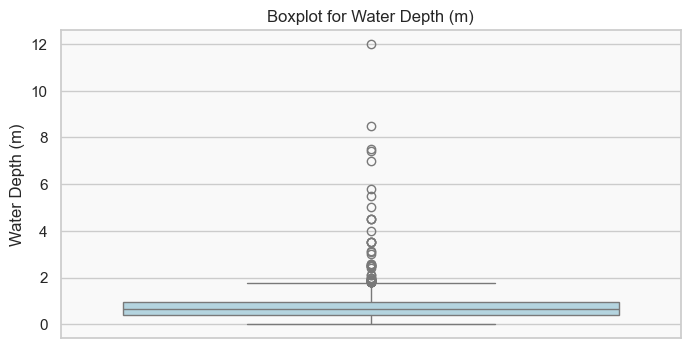

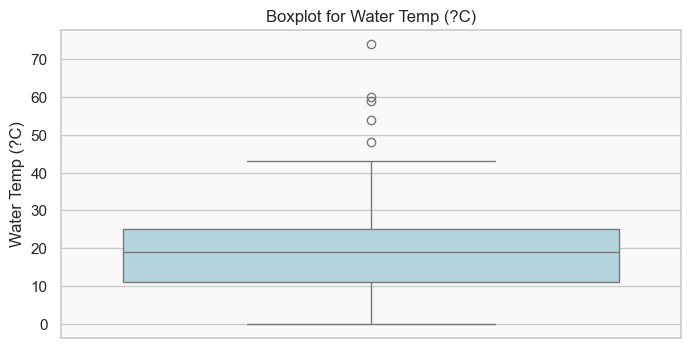

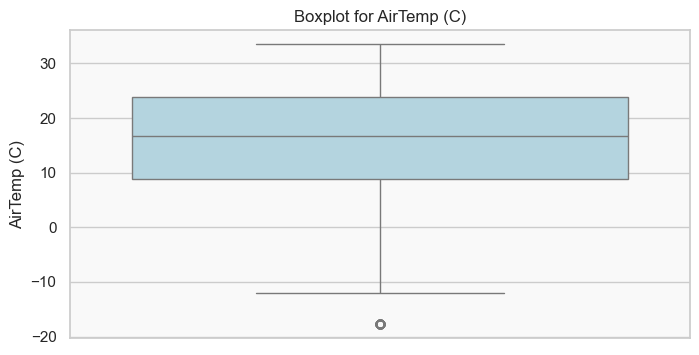

In [25]:
# 8. Boxplots to Check for Outliers in Numerical Features
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=data[col], color="lightblue")
    plt.title(f"Boxplot for {col}")
    plt.ylabel(col)
    plt.show()

# Seaborn automatically calculates Q1, Q3, IQR, and plots:
# Box: 25th to 75th percentile
# Line inside box: median
# Dots outside whiskers: outliers or anomalies

In [26]:
# 9. Column-Wise Analysis
# this give full overview
print("\n🧾 **Column-Wise Analysis:**\n")
for col in data.columns:
    print(f"\n🔹 **{col}**")
    print(f" - Data Type: {data[col].dtype}")
    print(f" - Unique Values: {data[col].nunique()}")
    print(f" - Sample Values: {data[col].unique()[:5]}")
    print(f" - Null Values: {data[col].isnull().sum()}")
    if data[col].dtype in ['int64', 'float64']:
       print(f" - Mean: {data[col].mean():.2f}, Std Dev: {data[col].std():.2f}, Min: {data[col].min()}, Max: {data[col].max()}")


🧾 **Column-Wise Analysis:**


🔹 **Site_Id**
 - Data Type: int64
 - Unique Values: 5
 - Sample Values: [2 4 1 0 3]
 - Null Values: 0
 - Mean: 1.63, Std Dev: 1.50, Min: 0, Max: 4

🔹 **Salinity (ppt)**
 - Data Type: float64
 - Unique Values: 83
 - Sample Values: [0.  1.  2.  2.8 3. ]
 - Null Values: 0
 - Mean: 0.73, Std Dev: 1.22, Min: 0.0, Max: 9.0

🔹 **Dissolved Oxygen (mg/L)**
 - Data Type: float64
 - Unique Values: 461
 - Sample Values: [ 4.8 10.   4.1  6.   7. ]
 - Null Values: 0
 - Mean: 6.37, Std Dev: 2.32, Min: 0.0, Max: 15.1

🔹 **pH (standard units)**
 - Data Type: float64
 - Unique Values: 62
 - Sample Values: [9.  6.5 7.  7.5 6. ]
 - Null Values: 0
 - Mean: 7.17, Std Dev: 0.79, Min: 0.3, Max: 9.9

🔹 **Water Depth (m)**
 - Data Type: float64
 - Unique Values: 143
 - Sample Values: [0.3 2.  0.7 1.  0.4]
 - Null Values: 0
 - Mean: 0.76, Std Dev: 0.62, Min: 0.01, Max: 12.0

🔹 **Water Temp (?C)**
 - Data Type: float64
 - Unique Values: 138
 - Sample Values: [20.   5.  21.  20.5 17.

In [27]:
# 10. Row-Wise Analysis

print("\n🧾 **Row-Wise Analysis:**\n")

# Display a sample of rows with maximum and minimum values for key numerical columns
key_columns = [
    'Salinity (ppt)',
    'Dissolved Oxygen (mg/L)',
    'pH (standard units)',
    'Water Depth (m)',
    'Water Temp (?C)',
    'AirTemp (C)'
]

for col in key_columns:
    print(f"\n🔸 Rows with Maximum and Minimum Values for {col}:")

    max_value = data[col].max()
    min_value = data[col].min()

    max_row = data.loc[data[col] == max_value].iloc[0]
    min_row = data.loc[data[col] == min_value].iloc[0]

    print(f" - Row with MAX {col} (Value: {max_value}):\n{max_row}\n")
    print(f" - Row with MIN {col} (Value: {min_value}):\n{min_row}\n")



🧾 **Row-Wise Analysis:**


🔸 Rows with Maximum and Minimum Values for Salinity (ppt):
 - Row with MAX Salinity (ppt) (Value: 9.0):
Site_Id                            0
Salinity (ppt)                   9.0
Dissolved Oxygen (mg/L)          4.2
pH (standard units)              8.0
Water Depth (m)                  0.9
Water Temp (?C)                 24.0
AirTemp (C)                22.222222
Salinity_Level                  High
Oxygen_Level                     Low
pH_Level                    Alkaline
Depth_Level                   Medium
WaterTemp_Level                 Warm
AirTemp_Level                    Hot
Name: 2308, dtype: object

 - Row with MIN Salinity (ppt) (Value: 0.0):
Site_Id                            2
Salinity (ppt)                   0.0
Dissolved Oxygen (mg/L)          4.8
pH (standard units)              9.0
Water Depth (m)                  0.3
Water Temp (?C)                 20.0
AirTemp (C)                16.111111
Salinity_Level                   Low
Oxygen_Level       

In [28]:
# 11. Duplicate Rows Check (based on specific columns)
print("\n🔍 **Duplicate Rows Check (Based on Key Sensor Columns):**")

# Define the subset of columns to check duplicates
subset_cols = [
    'Salinity (ppt)',
    'Dissolved Oxygen (mg/L)',
    'pH (standard units)',
    'Water Depth (m)',
    'Water Temp (?C)',
    'AirTemp (C)'
]

# Count duplicates based on those columns
duplicate_count = data.duplicated(subset=subset_cols).sum()
print(f" - Total Duplicate Rows (based on sensor readings): {duplicate_count}")

# If duplicates exist, display them
if duplicate_count > 0:
    print(" - Displaying Duplicate Rows:\n")
    print(data[data.duplicated(subset=subset_cols, keep=False)])



🔍 **Duplicate Rows Check (Based on Key Sensor Columns):**
 - Total Duplicate Rows (based on sensor readings): 7
 - Displaying Duplicate Rows:

      Site_Id  Salinity (ppt)  Dissolved Oxygen (mg/L)  pH (standard units)  \
252         0             4.4                     9.90                  7.2   
2205        0             0.0                    10.00                  7.0   
235         0             3.3                     6.80                  6.8   
291         0             2.2                     9.71                  7.6   
292         0             2.8                     8.15                  6.7   
290         0             2.4                     8.69                  7.2   
257         0             2.8                     8.15                  6.7   
2157        2             0.0                     4.20                  7.0   
234         0             3.3                     6.80                  6.8   
289         0             4.4                     9.90            

In [29]:
# 13. Row Integrity: Check for Rows with Extreme Low/High Values in Numerical Columns
print("\n📊 **Row Integrity Check for Extreme Values:**")
thresh_low = 0.05  # 5% threshold for low values
thresh_high = 0.95  # 95% threshold for high values

for col in key_columns:
    low_value_threshold = data[col].quantile(thresh_low)
    high_value_threshold = data[col].quantile(thresh_high)
    print(f"\nColumn: {col}")
    print(f" - Rows below {thresh_low*100}% threshold ({low_value_threshold}): {len(data[data[col] < low_value_threshold])}")
    print(f" - Rows above {thresh_high*100}% threshold ({high_value_threshold}): {len(data[data[col] > high_value_threshold])}")


📊 **Row Integrity Check for Extreme Values:**

Column: Salinity (ppt)
 - Rows below 5.0% threshold (0.0): 0
 - Rows above 95.0% threshold (3.4): 117

Column: Dissolved Oxygen (mg/L)
 - Rows below 5.0% threshold (3.0): 109
 - Rows above 95.0% threshold (10.2): 116

Column: pH (standard units)
 - Rows below 5.0% threshold (6.5): 105
 - Rows above 95.0% threshold (8.7): 111

Column: Water Depth (m)
 - Rows below 5.0% threshold (0.2): 115
 - Rows above 95.0% threshold (1.5): 118

Column: Water Temp (?C)
 - Rows below 5.0% threshold (5.0): 99
 - Rows above 95.0% threshold (29.0): 104

Column: AirTemp (C)
 - Rows below 5.0% threshold (-1.111111111): 118
 - Rows above 95.0% threshold (28.33333333): 100


In [30]:
print("\n📏 **Logical Range Check for Numerical Columns:**")

# Define acceptable ranges for each numerical column
valid_ranges = {
    'Salinity (ppt)': (0, 50),  # Salinity shouldn't be negative; 0–50 is safe
    'Dissolved Oxygen (mg/L)': (0, 20),  # DO is always ≥ 0, rarely > 20
    'pH (standard units)': (0, 14),  # pH scale is 0 to 14
    'Water Depth (m)': (0, 50),  # Depth can't be negative; max depends on dataset
    'Water Temp (?C)': (0, 100),  # Water boils at 100°C
    'AirTemp (C)': (-50, 60)  # Extreme air temps range from -50 to 60°C
}

# Check each column for out-of-range values
for col, (min_val, max_val) in valid_ranges.items():
    outliers = data[(data[col] < min_val) | (data[col] > max_val)]

    print(f"\n🔎 Checking {col}:")
    if outliers.empty:
        print(f" - All values are within the valid range ({min_val} to {max_val}).")
    else:
        print(f" - Found {len(outliers)} out-of-range value(s)!")
        print(outliers[[col]])  # print only the column with the problem



📏 **Logical Range Check for Numerical Columns:**

🔎 Checking Salinity (ppt):
 - All values are within the valid range (0 to 50).

🔎 Checking Dissolved Oxygen (mg/L):
 - All values are within the valid range (0 to 20).

🔎 Checking pH (standard units):
 - All values are within the valid range (0 to 14).

🔎 Checking Water Depth (m):
 - All values are within the valid range (0 to 50).

🔎 Checking Water Temp (?C):
 - All values are within the valid range (0 to 100).

🔎 Checking AirTemp (C):
 - All values are within the valid range (-50 to 60).


In [31]:
from itertools import combinations

print("\n🗂️ **Cross-Validation of Categorical Columns:**")

categorical_columns = [
    'Salinity_Level',
    'Oxygen_Level',
    'pH_Level',
    'Depth_Level',
    'WaterTemp_Level',
    'AirTemp_Level'
]

# Loop through all unique pairs of categorical columns
for col1, col2 in combinations(categorical_columns, 2):
    print(f"\n🔄 Unique combinations of {col1} and {col2}:")
    combo_counts = data.groupby([col1, col2]).size().reset_index(name='Count')
    print(combo_counts)



🗂️ **Cross-Validation of Categorical Columns:**

🔄 Unique combinations of Salinity_Level and Oxygen_Level:
  Salinity_Level Oxygen_Level  Count
0            Low          Low    638
1            Low       Normal    878
2            Low         High    325
3         Medium          Low    111
4         Medium       Normal    166
5         Medium         High    242
6           High          Low      2
7           High       Normal      5
8           High         High      3

🔄 Unique combinations of Salinity_Level and pH_Level:
  Salinity_Level  pH_Level  Count
0            Low    Acidic    750
1            Low   Neutral    782
2            Low  Alkaline    309
3         Medium    Acidic     25
4         Medium   Neutral    258
5         Medium  Alkaline    236
6           High    Acidic      1
7           High   Neutral      4
8           High  Alkaline      5

🔄 Unique combinations of Salinity_Level and Depth_Level:
  Salinity_Level Depth_Level  Count
0            Low     Shallow    7

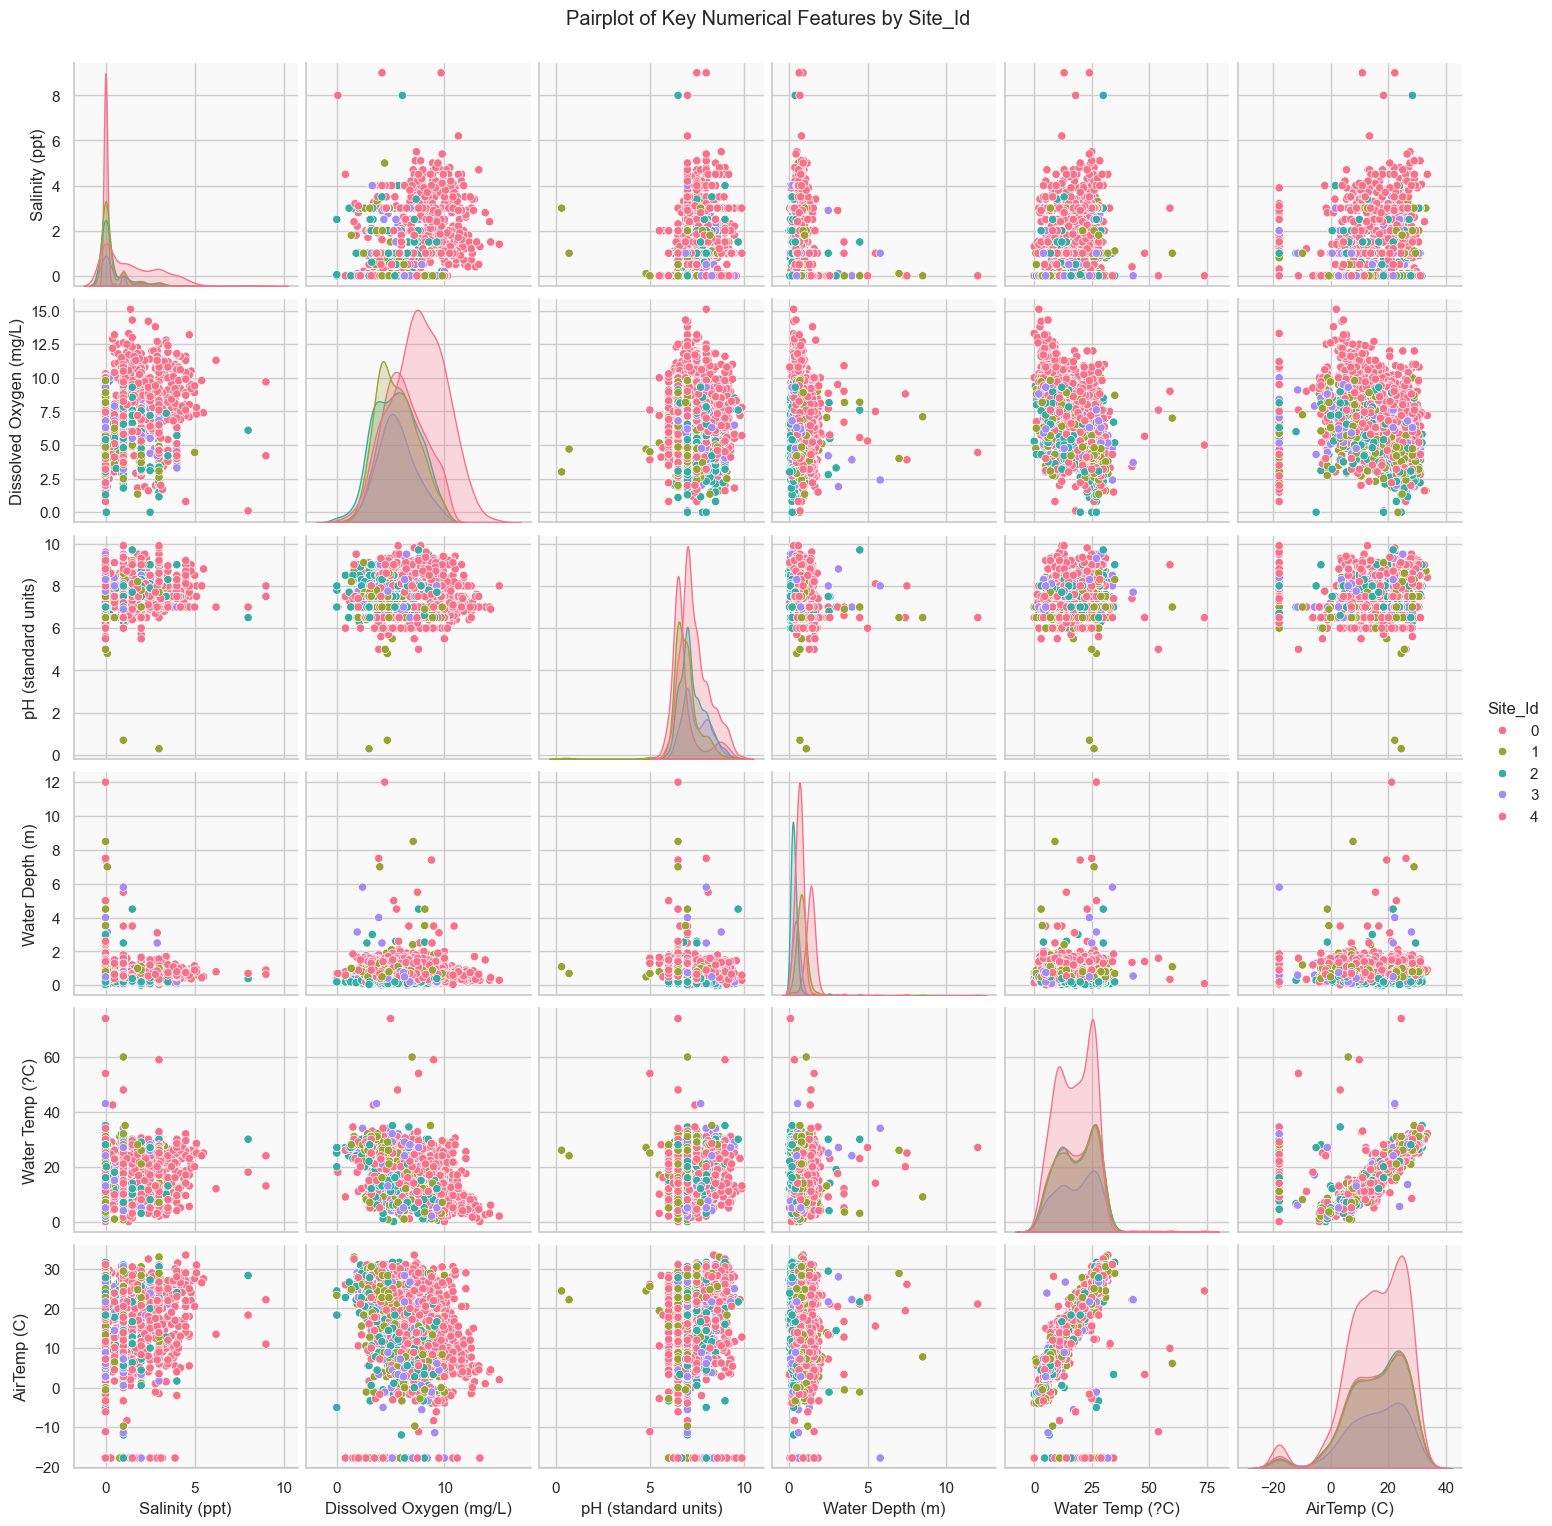

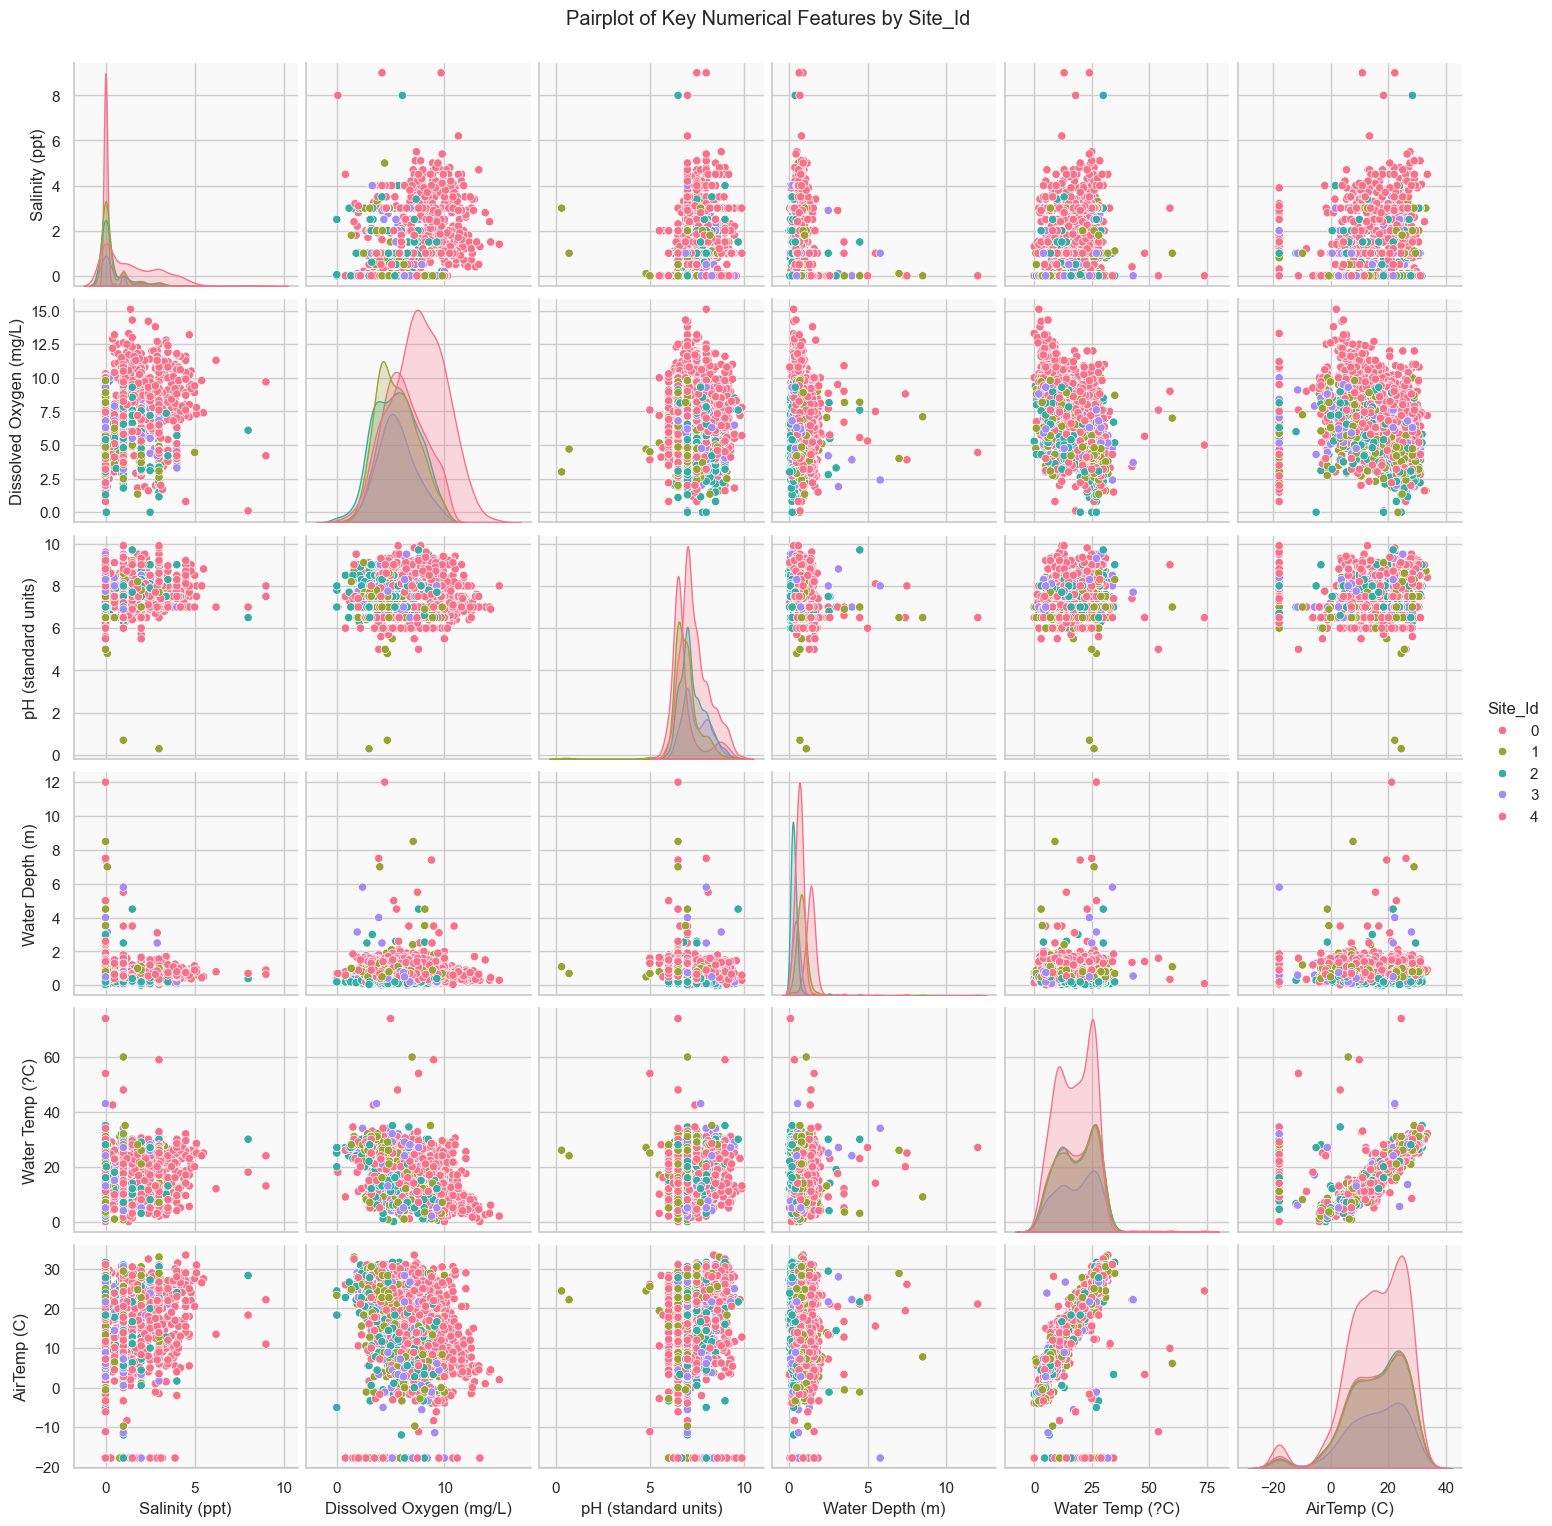

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# 26. Pairplot for Numerical Relationships
sns.pairplot(
    data,
    hue='Site_Id',
    vars=[
        'Salinity (ppt)',
        'Dissolved Oxygen (mg/L)',
        'pH (standard units)',
        'Water Depth (m)',
        'Water Temp (?C)',
        'AirTemp (C)'
    ],
    palette="husl"
)

plt.suptitle("Pairplot of Key Numerical Features by Site_Id", y=1.02)
plt.show()


# 26. Pairplot for Numerical Relationships
sns.pairplot(
    data,
    hue='Site_Id',
    vars=[
        'Salinity (ppt)',
        'Dissolved Oxygen (mg/L)',
        'pH (standard units)',
        'Water Depth (m)',
        'Water Temp (?C)',
        'AirTemp (C)'
    ],
    palette="husl"
)

plt.suptitle("Pairplot of Key Numerical Features by Site_Id", y=1.02)
plt.show()


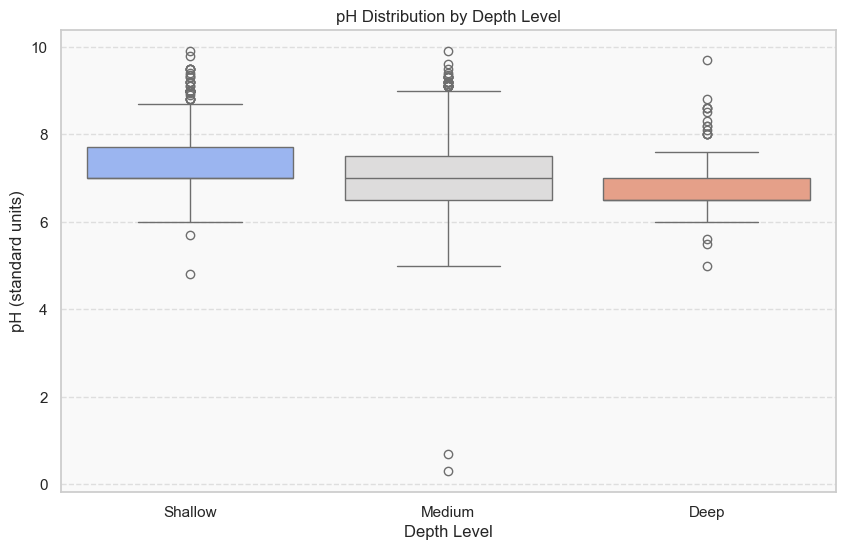

In [33]:


# 28. pH Distribution by Depth Level (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Depth_Level', y='pH (standard units)', data=data, palette="coolwarm")
plt.title("pH Distribution by Depth Level")
plt.xlabel("Depth Level")
plt.ylabel("pH (standard units)")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()


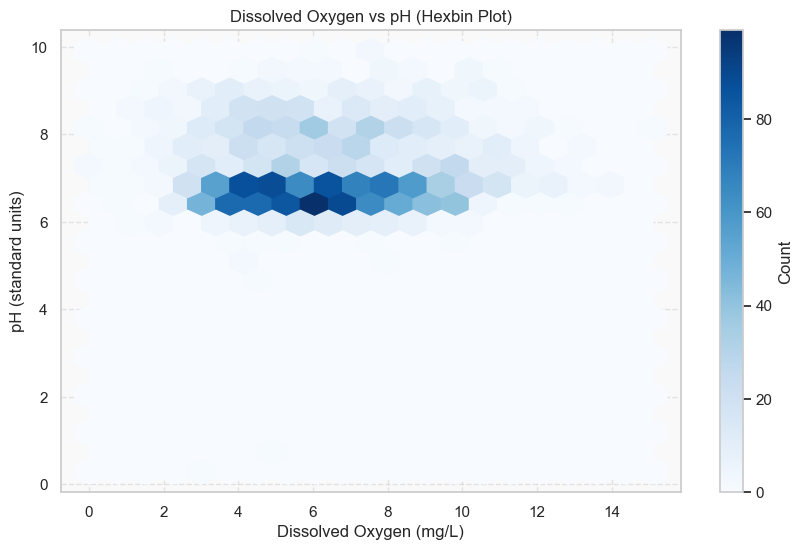

In [34]:


# 33. Dissolved Oxygen vs pH (Hexbin Plot)
plt.figure(figsize=(10, 6))
plt.hexbin(
    data['Dissolved Oxygen (mg/L)'],
    data['pH (standard units)'],
    gridsize=20,
    cmap='Blues'
)
plt.colorbar(label='Count')
plt.title("Dissolved Oxygen vs pH (Hexbin Plot)")
plt.xlabel("Dissolved Oxygen (mg/L)")
plt.ylabel("pH (standard units)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


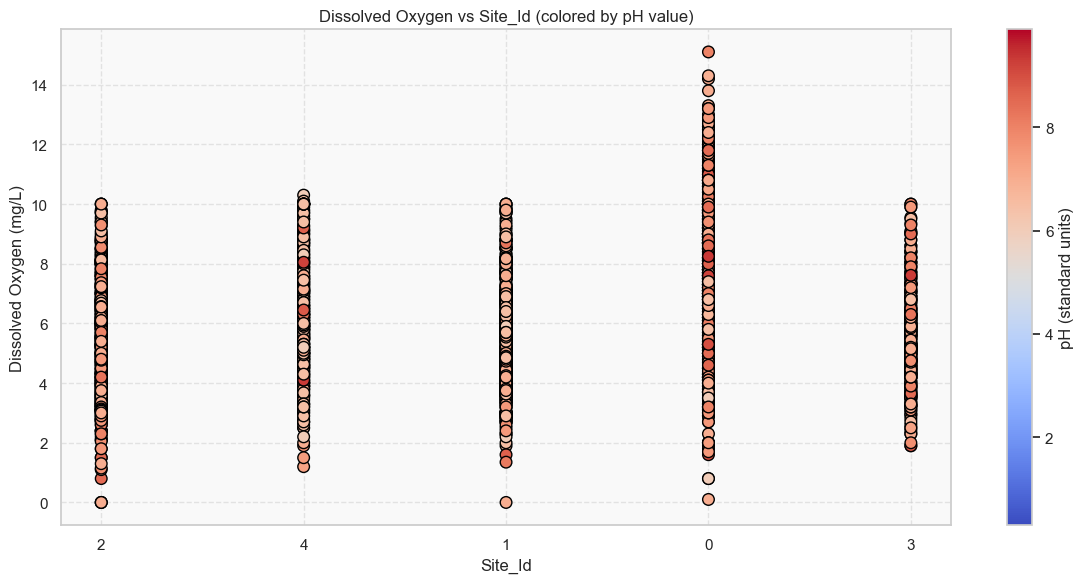

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert Site_Id to string type first, then to a categorical type for plotting
data['Site_Id_Categorical'] = data['Site_Id'].astype(str).astype('category')

# 35. DO vs Site_Id, colored by actual pH value
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    data['Site_Id_Categorical'], # Use the categorical version for plotting
    data['Dissolved Oxygen (mg/L)'],
    c=data['pH (standard units)'],
    cmap='coolwarm',
    edgecolors='black',
    s=70
)

plt.colorbar(scatter, label='pH (standard units)')
plt.title("Dissolved Oxygen vs Site_Id (colored by pH value)")
plt.xlabel("Site_Id")
plt.ylabel("Dissolved Oxygen (mg/L)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [36]:
data.head()

Site_Id  Salinity (ppt)  Dissolved Oxygen (mg/L)  pH (standard units)  \
1429        2             0.0                      4.8                  9.0   
1234        4             0.0                     10.0                  6.5   
1405        1             0.0                      4.1                  7.0   
814         0             1.0                      6.0                  6.5   
2211        1             1.0                      7.0                  7.0   

      Water Depth (m)  Water Temp (?C)  AirTemp (C) Salinity_Level  \
1429              0.3             20.0    16.111111            Low   
1234              2.0              5.0     6.111111            Low   
1405              0.7             21.0    16.111111            Low   
814               0.7             20.5    17.777778            Low   
2211              1.0             17.0    21.111111            Low   

     Oxygen_Level  pH_Level Depth_Level WaterTemp_Level AirTemp_Level  \
1429          Low  Alkaline     Shallow            Warm          Mild   
1234         High    Acidic        Deep            Cold          Cold   
1405          Low   Neutral      Medium            Warm          Mild   
814        Normal    Acidic      Medium            Warm          Mild   
2211       Normal   Neutral      Medium            Warm           Hot   

     Site_Id_Categorical  
1429                   2  
1234                   4  
1405                   1  
814                    0  
2211                   1